### Declaración de librerías Python

In [1]:
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import IPython
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from anytree import Node, RenderTree
import itertools
from PIL import Image
import re

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#se puede buscar por autor 
#https://www.geogebra.org/u/gtinoco

url_base="http://geogebra.org"
url_material="https://www.geogebra.org/m/"
url_recursos="https://www.geogebra.org/materials"
url_abrir_recurso="https://www.geogebra.org/classic"

### Definición de funciones base para crear la nube de palabras

In [6]:
##funcion que crea una nube de palabras
pi = np.array(Image.open("pi.jpg"))
aureo = np.array(Image.open("aureo.png"))

def create_cloud(data,stopwords,max_words):
    #wordcloud
    # import package and its set of stopwords
    # instantiate a word cloud object
    #width=mask.shape[1],height=mask.shape[0]
    #cloud = WordCloud(mask=mask,width=1100,height=600,background_color='white',max_words=max_words, stopwords=stopwords)
    cloud = WordCloud(width=1100,height=600,background_color='white',max_words=max_words, stopwords=stopwords)
    # generate the word cloud
    cloud.generate((" ").join((data)))
    fig = plt.figure()
    fig.set_figwidth(32) # set width
    fig.set_figheight(24) # set height

    # display the cloud
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

#funcio que genera un dataframe con los datos extraidos
def crea_fichero(titles,links,nombre):
    df = pd.DataFrame(columns=["Titulo Recurso","Enlace"])
    df["Titulo Recurso"]=titles
    df["Enlace"]=links
    df.to_csv(nombre+".csv", sep=',',index=False)
    return df


# Busqueda de recursos Geogebra mediante scraping web

## Encontrar recursos Geogebra por temática

In [ ]:
#DECUBRIMIENTO TEMATICAS GEOGEBRA MEDIANTE SCRAPING

req = Request(url_recursos)
req.add_header("Cookie", "GeoGebraLangUI=es-ES")# insercion de cookies para que busque en español
content = BeautifulSoup(urlopen(req).read(),"html5lib")

#acceder a los enlaces del la pagina base y a sus nombres
enlaces = content.find_all('a', class_='child')
titles=[]
titles_1=[]
links=[]

for a in enlaces:
    titles_1.append(a.text)
titles.append(titles_1)
links_1 = [url_base+a['href'] for a in enlaces ]

links.append(links_1)
for link1,title1 in zip(links_1,titles_1):
    req = Request(link1)
    req.add_header("Cookie", "GeoGebraLangUI=es-ES")
    content = BeautifulSoup(urlopen(req).read(),"html5lib")
    #acceder a los enlaces del la pagina web y a sus nombres
    enlaces = content.find_all('a', class_='child')
    titles_2=[]
    for a in enlaces:
        titles_2.append(a.text)    
        #titles_2.append(title1+": "+a.text)    
    links_2 = [url_base+a['href'] for a in enlaces ]
    titles.append(titles_2)
    links.append(links_2)
    for link2,title2 in zip(links_2,titles_2):
        req = Request(link2)
        req.add_header("Cookie", "GeoGebraLangUI=es-ES")
        content = BeautifulSoup(urlopen(req).read(),"html5lib")
        #acceder a los enlaces del la pagina web y a sus nombres
        enlaces = content.find_all('a', class_='child')        
        if len(enlaces) > 0:        
            titles_3=[]
            for a in enlaces:
                titles_3.append(a.text)    
                #titles_3.append(title2+": "+a.text)    
            links_3 = [url_base+a['href'] for a in enlaces ]
            titles.append(titles_3)
            links.append(links_3)
        else:
            continue          

#creacion de nube con los conceptos clave de las temáticas
stopwords = ["de", "y","del", "los", "la","un", "dos", "las","el", "en","una","con","sobre","por","sus",
             "Algebra","Geometría","Cálculo","Funciones",
            "Trigonometría","Probabilidad","Estadísitca","Diagr"]

create_cloud(list(itertools.chain.from_iterable(titles)),stopwords,1000)

titles = [item for sublist in titles for item in sublist]
links = [item for sublist in links for item in sublist]

df=crea_fichero(titles,links,"fichero_tematica_general.csv")

# Identificar recursos por etapa educativa

## Temario de educación media (13-18 años)

In [5]:
#Encontrar todo un conjunto de recursos referente a un tema en secundaria

#algebra 
req = Request("https://www.geogebra.org/m/rbp3sfdh")
req.add_header("Cookie", "GeoGebraLangUI=es-ES")
content = BeautifulSoup(urlopen(req).read(),"html5lib")

#acceder a los enlaces del la pagina web y a sus nombres

enlaces = str(content.find_all(class_="bbcode-list"))

links=[]
titles=["Álgebra",
        "Aritmética",
        "Geometría",
        "Estadística y Probabilidad"]

for m in re.finditer('/m/', enlaces):
    links.append(url_material+enlaces[m.end():m.end()+8])
links=links[0:4]

crea_fichero(titles,links,"fichero_13_18.csv")


,Titulo Recurso,Enlace
0,Álgebra,https://www.geogebra.org/m/vmtqcsdg
1,Aritmética,https://www.geogebra.org/m/q45yp9ud
2,Geometría,https://www.geogebra.org/m/etd87kcu
3,Estadística y Probabilidad,https://www.geogebra.org/m/tusr3grk


In [6]:
#pending abrir todos los libros 
#COMPETENCIAS 1 ESO 
req = Request(links[0])
req.add_header("Cookie", "GeoGebraLangUI=es-ES")
content = BeautifulSoup(urlopen(req).read(),"html5lib")
#acceder a los enlaces del la pagina web y a sus nombres
enlaces = content.find_all('a',class_='truncate ggb-teal-text text-darken-2')
third_level_links = [ url_base+a['href'] for a in enlaces ]
third_level_titles = [ a['title'] for a in enlaces ]
iframe = '<iframe \
  scrolling="yes" \
  src="'+str(third_level_links[1])+'" \
  width="1000px" \
  height="900px" \
  style="border:0px;"> \
  </iframe>'

IPython.display.HTML(iframe)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [11]:
#pending abrir todos los libros 
#COMPETENCIAS 1 ESO 
req = Request(links[1])
req.add_header("Cookie", "GeoGebraLangUI=es-ES")
content = BeautifulSoup(urlopen(req).read(),"html5lib")
#acceder a los enlaces del la pagina web y a sus nombres
enlaces = content.find_all('a',class_='truncate ggb-teal-text text-darken-2')
third_level_links = [ url_base+a['href'] for a in enlaces ]
third_level_titles = [ a['title'] for a in enlaces ]
iframe = '<iframe \
  scrolling="yes" \
  src="'+str(third_level_links[1])+'" \
  width="1000px" \
  height="900px" \
  style="border:0px;"> \
  </iframe>'

IPython.display.HTML(iframe)

In [9]:
#pending abrir todos los libros 
#COMPETENCIAS 1 ESO 
req = Request(links[2])
req.add_header("Cookie", "GeoGebraLangUI=es-ES")
content = BeautifulSoup(urlopen(req).read(),"html5lib")
#acceder a los enlaces del la pagina web y a sus nombres
enlaces = content.find_all('a',class_='truncate ggb-teal-text text-darken-2')
third_level_links = [ url_base+a['href'] for a in enlaces ]
third_level_titles = [ a['title'] for a in enlaces ]
iframe = '<iframe \
  scrolling="yes" \
  src="'+str(third_level_links[1])+'" \
  width="1000px" \
  height="900px" \
  style="border:0px;"> \
  </iframe>'

IPython.display.HTML(iframe)

In [10]:
#pending abrir todos los libros 
#COMPETENCIAS 1 ESO 
req = Request(links[3])
req.add_header("Cookie", "GeoGebraLangUI=es-ES")
content = BeautifulSoup(urlopen(req).read(),"html5lib")
#acceder a los enlaces del la pagina web y a sus nombres
enlaces = content.find_all('a',class_='truncate ggb-teal-text text-darken-2')
third_level_links = [ url_base+a['href'] for a in enlaces ]
third_level_titles = [ a['title'] for a in enlaces ]
iframe = '<iframe \
  scrolling="yes" \
  src="'+str(third_level_links[1])+'" \
  width="1000px" \
  height="900px" \
  style="border:0px;"> \
  </iframe>'

IPython.display.HTML(iframe)

## Temario para educación superior 16- 18 años

In [12]:
#Encontrar todo un conjunto de recursos referente a un tema en secundaria

req = Request("https://www.geogebra.org/m/mjvewg2t")
req.add_header("Cookie", "GeoGebraLangUI=es-ES")
content = BeautifulSoup(urlopen(req).read(),"html5lib")

#acceder a los enlaces del la pagina web y a sus nombres

enlaces = str(content.find_all(class_="bbcode-list"))

links=[]
titles=["Geometría analítica",
        "Precálculo y cálculo",
       "Álgebra lineal"]

stopwords = ["de", "y","del", "los", "la","un", "dos", "las","el", "en","una","con","sobre","por","sus",
             "Algebra","Geometría","Cálculo","Funciones",
            "Trigonometría","Probabilidad","Estadísitca","Diagr"]

for m in re.finditer('/m/', enlaces):
    links.append(url_material+enlaces[m.end():m.end()+8])
links=links[0:3]

crea_fichero(titles,links,"fichero_16_18.csv")


,Titulo Recurso,Enlace
0,Geometría analítica,https://www.geogebra.org/m/xyzwdrtb
1,Precálculo y cálculo,https://www.geogebra.org/m/ha5rnam9
2,Álgebra lineal,https://www.geogebra.org/m/xn8kh4f5


In [12]:
#pending abrir todos los libros 
#COMPETENCIAS 1 ESO 
req = Request(links[0])
req.add_header("Cookie", "GeoGebraLangUI=es-ES")
content = BeautifulSoup(urlopen(req).read(),"html5lib")
#acceder a los enlaces del la pagina web y a sus nombres
enlaces = content.find_all('a',class_='truncate ggb-teal-text text-darken-2')
third_level_links = [ url_base+a['href'] for a in enlaces ]
third_level_titles = [ a['title'] for a in enlaces ]
iframe = '<iframe \
  scrolling="yes" \
  src="'+str(third_level_links[1])+'" \
  width="1000px" \
  height="900px" \
  style="border:0px;"> \
  </iframe>'

IPython.display.HTML(iframe)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# Identificar recursos por curso

In [13]:
#pending abrir todos los libros 
#COMPETENCIAS 1 ESO 
req = Request(links[1])
req.add_header("Cookie", "GeoGebraLangUI=es-ES")
content = BeautifulSoup(urlopen(req).read(),"html5lib")
#acceder a los enlaces del la pagina web y a sus nombres
enlaces = content.find_all('a',class_='truncate ggb-teal-text text-darken-2')
third_level_links = [ url_base+a['href'] for a in enlaces ]
third_level_titles = [ a['title'] for a in enlaces ]
iframe = '<iframe \
  scrolling="yes" \
  src="'+str(third_level_links[1])+'" \
  width="1000px" \
  height="900px" \
  style="border:0px;"> \
  </iframe>'

IPython.display.HTML(iframe)

In [14]:
#pending abrir todos los libros 
#COMPETENCIAS 1 ESO 
req = Request(links[2])
req.add_header("Cookie", "GeoGebraLangUI=es-ES")
content = BeautifulSoup(urlopen(req).read(),"html5lib")
#acceder a los enlaces del la pagina web y a sus nombres
enlaces = content.find_all('a',class_='truncate ggb-teal-text text-darken-2')
third_level_links = [ url_base+a['href'] for a in enlaces ]
third_level_titles = [ a['title'] for a in enlaces ]
iframe = '<iframe \
  scrolling="yes" \
  src="'+str(third_level_links[1])+'" \
  width="1000px" \
  height="900px" \
  style="border:0px;"> \
  </iframe>'

IPython.display.HTML(iframe)

## 1 ESO

### Presentación del curso con una nube de palabras

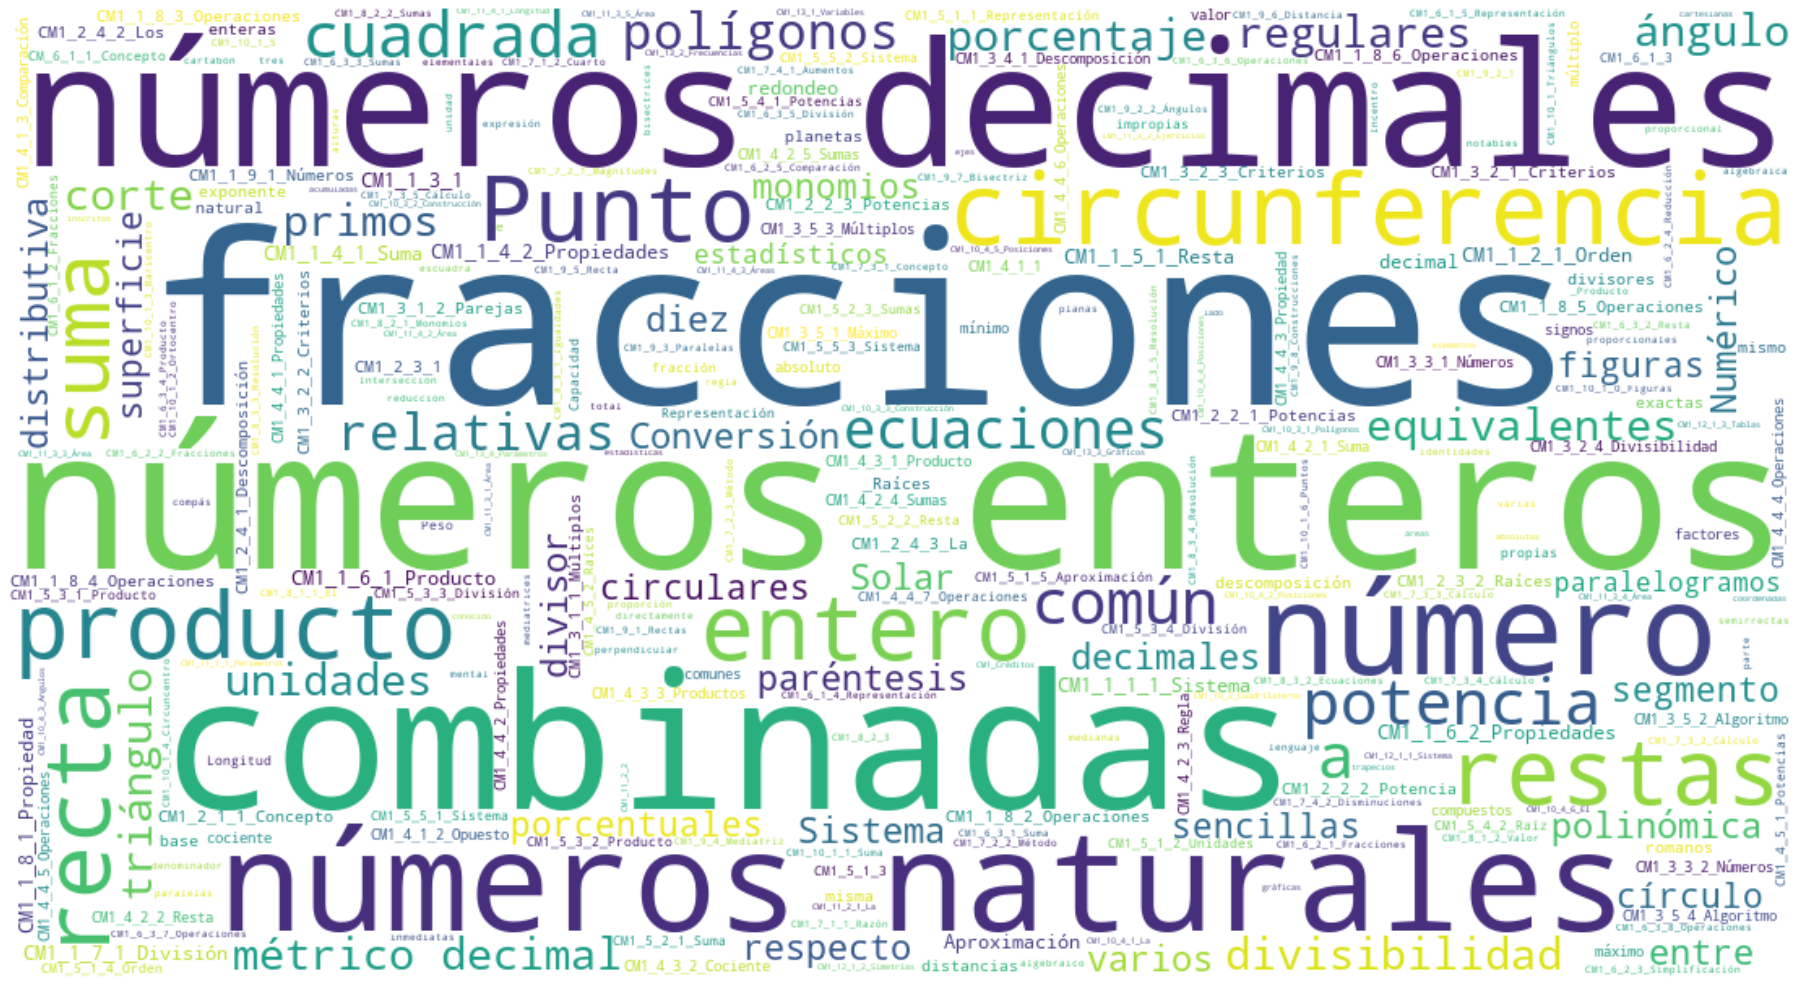

In [15]:
#COMPETENCIAS 1 ESO 
req = Request("https://www.geogebra.org/m/dEV5qYNY")
req.add_header("Cookie", "GeoGebraLangUI=es-ES")
content = BeautifulSoup(urlopen(req).read(),"html5lib")

#acceder a los enlaces del la pagina web y a sus nombres

enlaces = content.find_all('a',class_='truncate ggb-teal-text text-darken-2')

third_level_links = [ url_base+a['href'] for a in enlaces ]
third_level_titles = [ a['title'] for a in enlaces ]

stopwords = ["de", "y","del", "los", "la","un", "dos", "las","el", "en","una","con","sobre","por","sus","CM"]

create_cloud(third_level_titles,stopwords,1000)


### Apertura del recurso Geogebra

In [16]:
iframe = '<iframe \
  scrolling="yes" \
  src="'+str(third_level_links[1])+'" \
  width="1000px" \
  height="900px" \
  style="border:0px;"> \
  </iframe>'

IPython.display.HTML(iframe)

## 2 ESO

### Presentación del curso con nube de palabras

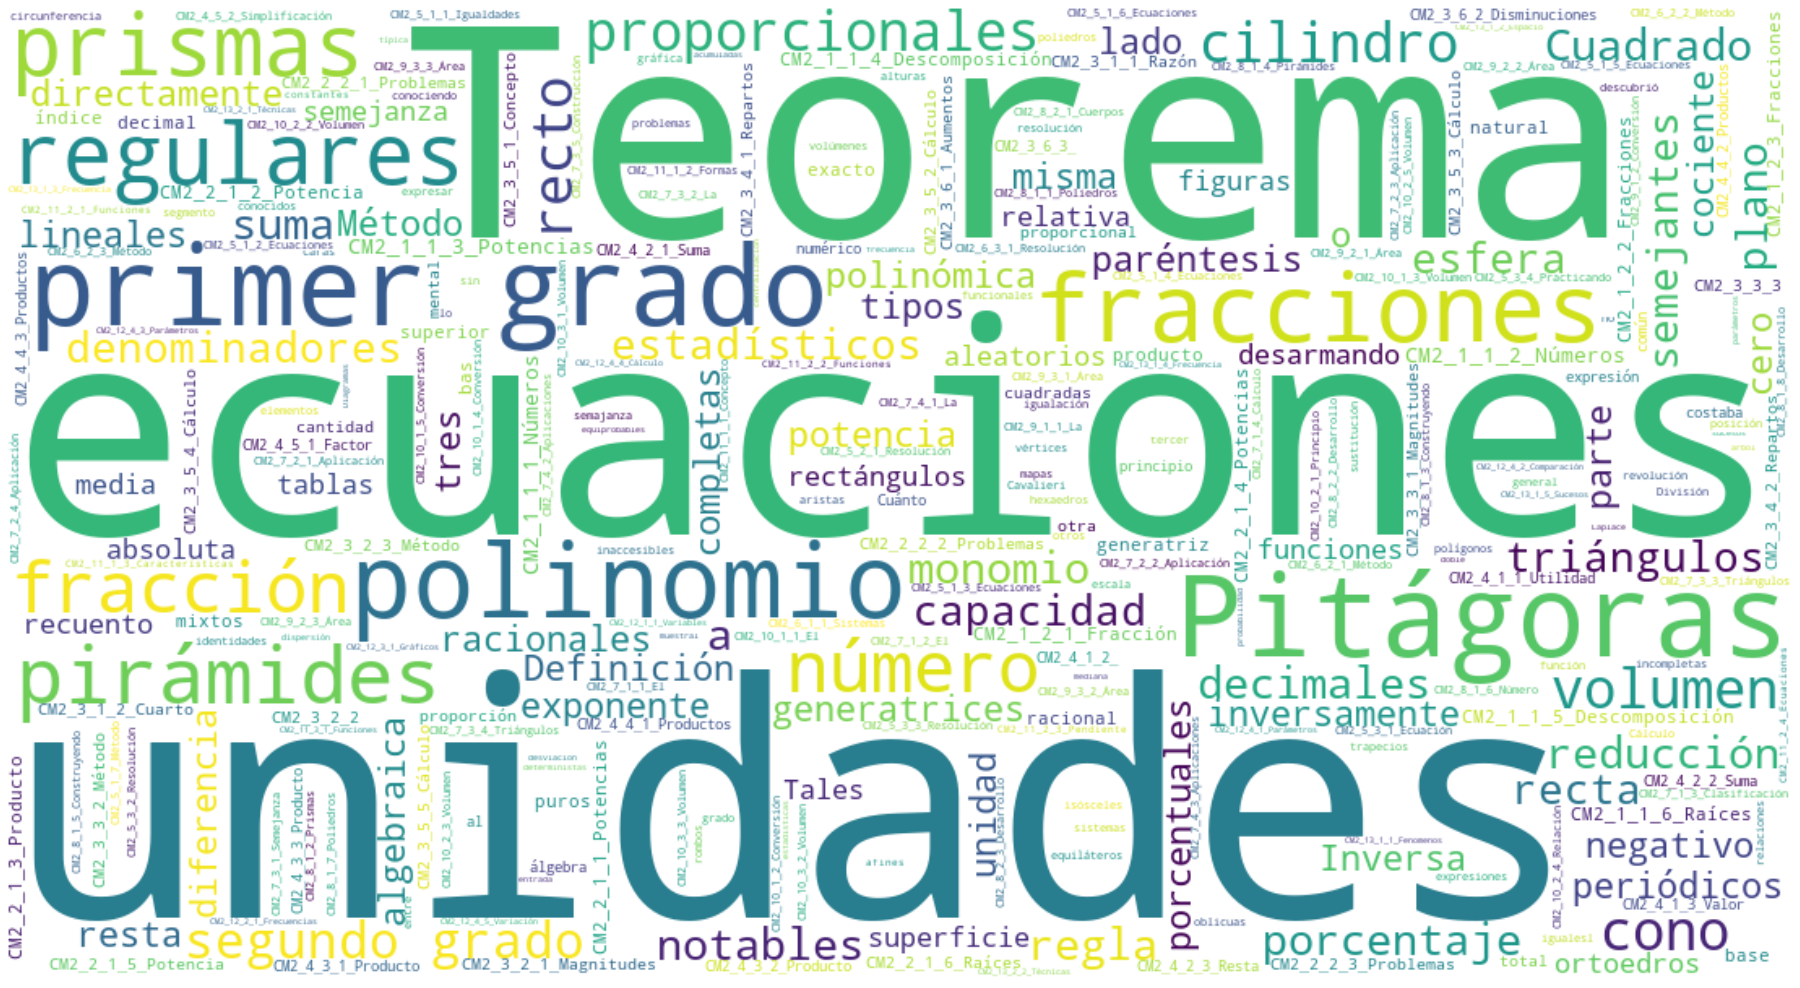

In [17]:
#COMPETENCIAS 2 ESO 
req = Request("https://www.geogebra.org/m/aFeyvgJK")
req.add_header("Cookie", "GeoGebraLangUI=es-ES")
content = BeautifulSoup(urlopen(req).read(),"html5lib")

#acceder a los enlaces del la pagina web y a sus nombres

enlaces = content.find_all('a',class_='truncate ggb-teal-text text-darken-2')
#third_level_links = [ url_abrir_recurso+a['href'][a['href'].find("/",5):] for a in enlaces ]
third_level_links= [ url_base+a['href'] for a in enlaces ]
third_level_titles = [ a['title'] for a in enlaces ]

stopwords = ["de", "y","del", "los", "la","un", "dos", "las","el", "en","una","con","sobre","por","sus","CM"]

create_cloud(third_level_titles,stopwords,1000)

### Apertura del recurso Geogebra

In [18]:
#COMPETENCIAS 2 ESO 
req = Request("https://www.geogebra.org/m/aFeyvgJK")
req.add_header("Cookie", "GeoGebraLangUI=es-ES")
content = BeautifulSoup(urlopen(req).read(),"html5lib")

#acceder a los enlaces del la pagina web y a sus nombres

enlaces = content.find_all('a',class_='truncate ggb-teal-text text-darken-2')

third_level_links = [ url_base+a['href'] for a in enlaces ]
third_level_titles = [ a['title'] for a in enlaces ]
iframe = '<iframe \
  scrolling="yes" \
  src="'+str(third_level_links[1])+'" \
  width="1000px" \
  height="900px" \
  style="border:0px;"> \
  </iframe>'

IPython.display.HTML(iframe)